#Imports and reading the data:

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Output.csv')
df

,item,depth,duration,mistakes,User
0,Korean Fried Chicken,1,25.272680,0,Nima
1,Thick crust pepperoni pizza,3,7.621724,1,Nima
2,Lobster roll,3,11.912208,1,Nima
3,Roman Thin crust pizza,6,7.524232,1,Nima
4,Pan-Seared Strip Steaks,6,45.583833,19,Nima
5,Vienna Coffee,1,12.249217,0,Nima
6,European Herbal Green Teas,4,33.757616,2,Nima
7,Italiano burger,4,3.206868,1,Nima
8,Italian Grilled Stuffed Beef Rolls,5,31.773078,4,Nima
9,New York Style Hot Dog,5,5.990242,1,Nima


# Time analysis

In [18]:
grouped_df = df.groupby('depth').agg(
    Count=('depth', 'count'),
    Duration_Sum=('duration', 'sum')
)

# Create a new column for the ratio
grouped_df['Average time'] = grouped_df['Duration_Sum'] / grouped_df['Count']
grouped_df

,Count,Duration_Sum,Average time
depth,,,
1,10,186.081604,18.608160
2,9,117.207740,13.023082
3,9,71.530709,7.947857
4,10,100.946470,10.094647
5,9,115.399805,12.822201
6,8,117.244744,14.655593


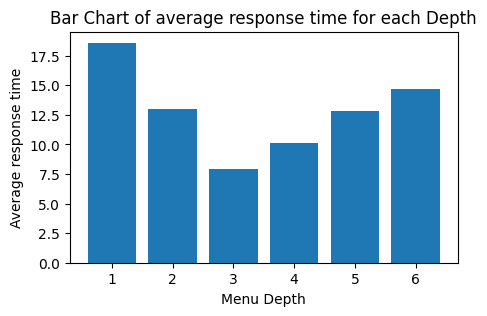

In [19]:
# Plotting
plt.figure(figsize=(5,3))
plt.bar(grouped_df.index, grouped_df['Average time'])
plt.xlabel('Menu Depth')
plt.ylabel('Average response time')
plt.title('Bar Chart of average response time for each Depth')
plt.show()

#Mistake Analysis

In [20]:
grouped_df = df.groupby('depth').agg(
    Count=('depth', 'count'),
    Mistakes_Sum=('mistakes', 'sum')
)

# Create a new column for the ratio
grouped_df['Average mistakes number'] = grouped_df['Mistakes_Sum'] / grouped_df['Count']
grouped_df

,Count,Mistakes_Sum,Average mistakes number
depth,,,
1,10,1,0.100000
2,9,10,1.111111
3,9,10,1.111111
4,10,13,1.300000
5,9,20,2.222222
6,8,32,4.000000


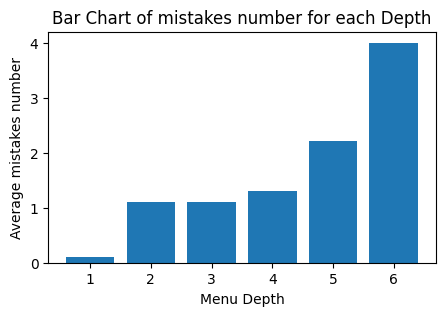

In [21]:
# Plotting
plt.figure(figsize=(5,3))
plt.bar(grouped_df.index, grouped_df['Average mistakes number'])
plt.xlabel('Menu Depth')
plt.ylabel('Average mistakes number')
plt.title('Bar Chart of mistakes number for each Depth')
plt.show()